# Algorytmy grafowe – minimalne drzewo rozpinające grafu

In [77]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

1. Implementacja algorytmu Dijkstry-Prima poszukiwania minimalnego drzewa rozpinajacego graf oraz wdrozenie algorytmu na podstawie ponizszego grafu.

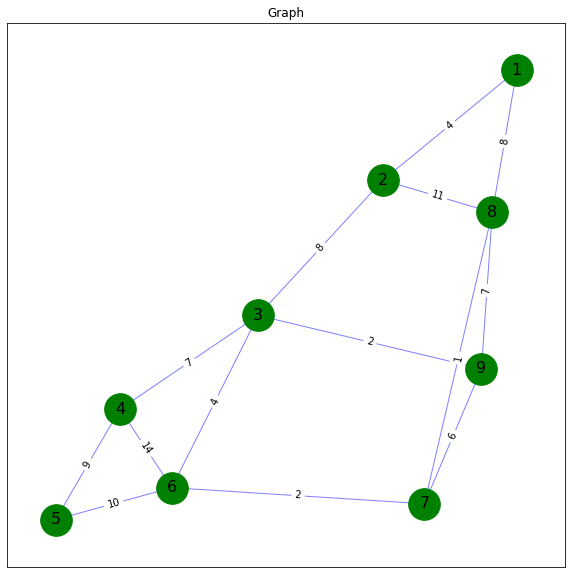

In [78]:
weights = [
    (1, 2, 4),
    (1, 8, 8),
    (2, 8, 11),
    (3, 2, 8),
    (3, 9, 2),
    (3, 6, 4),
    (3, 4, 7),
    (4, 5, 9),
    (4, 6, 14),
    (5, 6, 10),
    (6, 7, 2),
    (7, 9, 6),
    (7, 8, 1),
    (8, 9, 7),
]

G = nx.Graph()

G.add_weighted_edges_from(weights)

fig = plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=[i for i in range(1, 10)], node_color='g', node_size=1000)
nx.draw_networkx_edges(G, pos, width=1,alpha=0.5,edge_color='b')

nx.draw_networkx_edge_labels(G, pos, font_size=10, edge_labels = nx.get_edge_attributes(G,'weight'))
nx.draw_networkx_labels(G, pos, font_size=16)

plt.title("Graph")
plt.show()

In [79]:
M = nx.to_numpy_array(G)
M

array([[ 0.,  4.,  8.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 4.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.],
       [ 8., 11.,  0.,  0.,  7.,  0.,  0.,  0.,  1.],
       [ 0.,  8.,  0.,  0.,  2.,  4.,  7.,  0.,  0.],
       [ 0.,  0.,  7.,  2.,  0.,  0.,  0.,  0.,  6.],
       [ 0.,  0.,  0.,  4.,  0.,  0., 14., 10.,  2.],
       [ 0.,  0.,  0.,  7.,  0., 14.,  0.,  9.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  6.,  2.,  0.,  0.,  0.]])

Algorytm

In [80]:

def dijkstraPrimAlgorithm(M, start):
    N = len(M)
    prevVertex = [0 for _ in range(N)]
    mst_edges = []
    sum = 0
    
    current = start - 1
    visited = []
    minimalNode = current

    while len(visited) < N:
        # Sprawdzam czy bierzacy wierzcholek zostal juz odwiedzony
        # Jest to konieczne w przypadku kiedy algorytm musi sie "wracac do poprzedniego wierzcholka"
        if current not in visited:
            visited.append(current)

        # Oznaczam wartosc minimalna bieganaca z bierzacego wierzcholka
        minimal = np.inf

        for i in range(N):
            # Iteruje po krawedziach wychodzacych i nie odwiedzonych
            if M[current][i] > 0 and i not in visited:
                if minimal > M[current][i]:
                    minimalNode = i
                    minimal = M[current][i]
        
        # Jezeli znaleziono jakis wierzholek to oznaczam poprzedni wierzcholek oraz dodaje do mst
        if minimalNode != current:
            prevVertex[minimalNode] = current
            mst_edges.append((current+1, minimalNode+1))
            current = minimalNode
        else:
        # Jezeli nie znaleziono to oznaczam bierzocy jako poprzedni
            current = prevVertex[current]
        
    return mst_edges



Prezentacja minimalnego drzewa rozpinajacego graf.

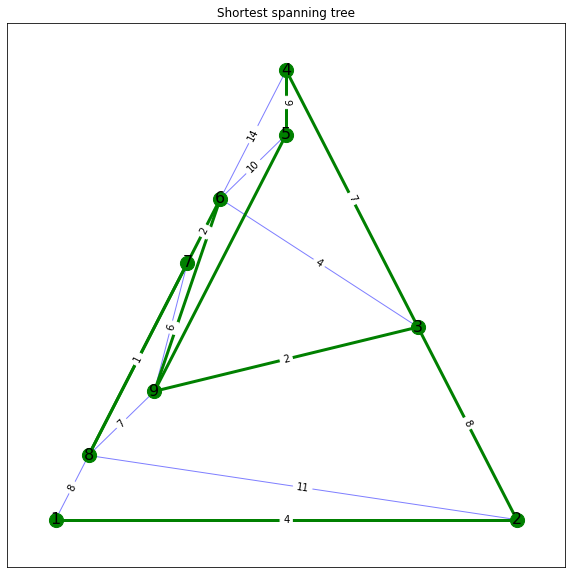

[(1, 2), (2, 4), (4, 5), (5, 9), (9, 3), (9, 6), (6, 8), (8, 7)]

In [81]:
sst = dijkstraPrimAlgorithm(nx.to_numpy_array(G), 1)

fig = plt.figure(figsize=(10, 10))

pos = nx.planar_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='g', node_size=200)
nx.draw_networkx_edges(G, pos, width=1,alpha=0.5,edge_color='b')
nx.draw_networkx_edges(G, pos, edgelist=sst, width=3, alpha=1, edge_color='g')

nx.draw_networkx_edge_labels(G, pos, font_size=10, edge_labels = nx.get_edge_attributes(G,'weight'))
nx.draw_networkx_labels(G, pos, font_size=16)

plt.title("Shortest spanning tree")
plt.show()
sst